<a href="https://colab.research.google.com/github/rsaeed15/rsaeed15/blob/main/NLP_Classifiers_Models_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Project: ML Models' Performance Comparison against NLP Text Classification   
# Author: Rifat Saeed

In [2]:
# Importing libraries
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
nltk.download('stopwords')
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Uploading spam csv file
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [4]:
# Building a spam mail classifier in Python
import pandas as pd
import io
df = pd.read_csv(r'spam.csv',encoding='ISO-8859-1',usecols=['v1','v2'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Null values
df.isna().sum()

v1    0
v2    0
dtype: int64

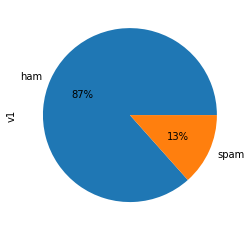

In [7]:
# Chart for 'ham' and 'spam' data
df.v1.value_counts().plot(kind='pie', autopct='%1.0f%%')

ham     4825
spam     747
Name: v1, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


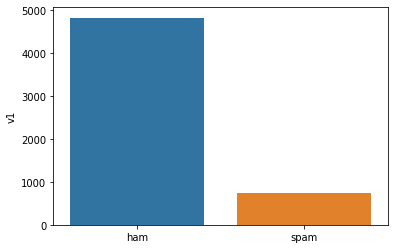

In [8]:
# Bar Plot
x=df['v1'].value_counts()
print(x)
sns.barplot(x.index,x)

In [9]:
df.rename(columns = {'v1':'Target', 'v2':'Email'}, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Email   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.Target.value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

In [12]:
!pip install text_hammer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [13]:
# Creating a function for text cleaning 
import text_hammer as th

In [14]:
def text_cleaning(df,col_name):
    #-----Remove Stopwords----
    df[col_name] = df[col_name].progress_apply(lambda x: th.remove_stopwords(x))
    #----Remove Special Character----
    df[col_name] = df[col_name].progress_apply(lambda x: th.remove_special_chars(x))
    #---Remove accented characters---
    df[col_name] = df[col_name].progress_apply(lambda x: th.remove_accented_chars(x))
    # ---Removing HTML tags and URL---
    df[col_name] = df[col_name].progress_apply(lambda x: th.remove_html_tags(x))
    df[col_name] = df[col_name].progress_apply(lambda x: th.remove_urls(x))
    #--- Converting into root words--
    df[col_name] = df[col_name].progress_apply(lambda x: th.make_base(x))                                      
    return df

In [15]:
df = text_cleaning(df, 'Email')

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

In [16]:
# Mapping the spam with 1 and ham with 0
df['Target'] = df.Target.map({'ham':0,'spam':1})

In [17]:
# Splitting the data into training and testing
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(df['Email'],df['Target'],
stratify = df['Target'], test_size = 0.2, random_state = 42)

In [18]:
# Model(1) Naive Bayes -- Multinomial Classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
vectorizer = TfidfVectorizer()
classifier  = Pipeline([('feature_generation', vectorizer), ('model',MultinomialNB())])

In [19]:
# Fitting the model
classifier.fit(X_train,y_train)

Pipeline(steps=[('feature_generation', TfidfVectorizer()),
                ('model', MultinomialNB())])

In [20]:
# Classification Report for Naive Bayes
from sklearn import metrics
y_predicted = classifier.predict(X_test)
print(metrics.classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.72      0.83       149

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [21]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, y_predicted)
print(results)

[[965   1]
 [ 42 107]]


In [22]:
# Model(2) Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier_rf  = Pipeline([('feature_generation', vectorizer), ('model',RandomForestClassifier())])

In [23]:
classifier_rf.fit(X_train, y_train)

Pipeline(steps=[('feature_generation', TfidfVectorizer()),
                ('model', RandomForestClassifier())])

In [24]:
from sklearn import metrics
y_predicted_rf = classifier_rf.predict(X_test)
print(metrics.classification_report(y_test,y_predicted_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.98      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [25]:
accuracy_train_rf=classifier_rf.score(X_train,y_train)

In [26]:
# Training Accuracy
accuracy_train_rf

1.0

In [27]:
# Model(3) Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression 

In [28]:
# Fitting the model using Logistic Regression(tf-idf)
classifier_lr = Pipeline([('feature_generation', vectorizer), ('model',LogisticRegression())])
#classifier_lr.fit(X_train, y_train) 

In [29]:
classifier_lr.fit(X_train, y_train)

Pipeline(steps=[('feature_generation', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [30]:
y_predicted_lr = classifier_lr.predict(X_test)
print(metrics.classification_report(y_test,y_predicted_lr))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [31]:
# Training Accuracy
accuracy_train_lr=classifier_rf.score(X_train,y_train)
accuracy_train_lr

1.0

In [32]:
# Predict Probabilities
lr_probs = classifier_lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [34]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Linear Regression Classifier: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Linear Regression Classifier: ROC AUC=0.983


In [35]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

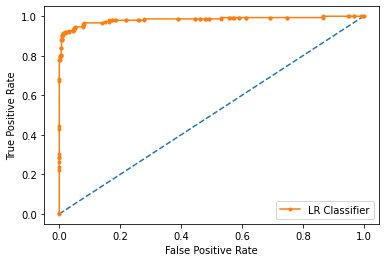

In [36]:
# Plot the roc curve for the model
import matplotlib.pyplot as plt
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LR Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()